In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Dataset Overview:
   CustomerID  Gender  SeniorCitizen  Tenure  MonthlyCharges  TotalCharges  \
0           1    Male              0      24       88.161367   2810.146167   
1           2  Female              1      36       54.062457   5068.339349   
2           3    Male              0      38       46.069453   4636.614674   
3           4    Male              0      25       69.603745    490.792269   
4           5    Male              1      18       89.289036    370.581472   

         Contract  PaymentMethod InternetService Churn  
0  Month-to-month   Mailed check             DSL   Yes  
1        One year  Bank transfer     Fiber optic    No  
2        Two year   Mailed check             DSL   Yes  
3        Two year  Bank transfer              No    No  
4        Two year  Bank transfer              No    No  

Top Correlated Features with Churn:
Tenure             0.226985
MonthlyCharges     0.166524
CustomerID         0.100541
Gender             0.032580
PaymentMethod      0.

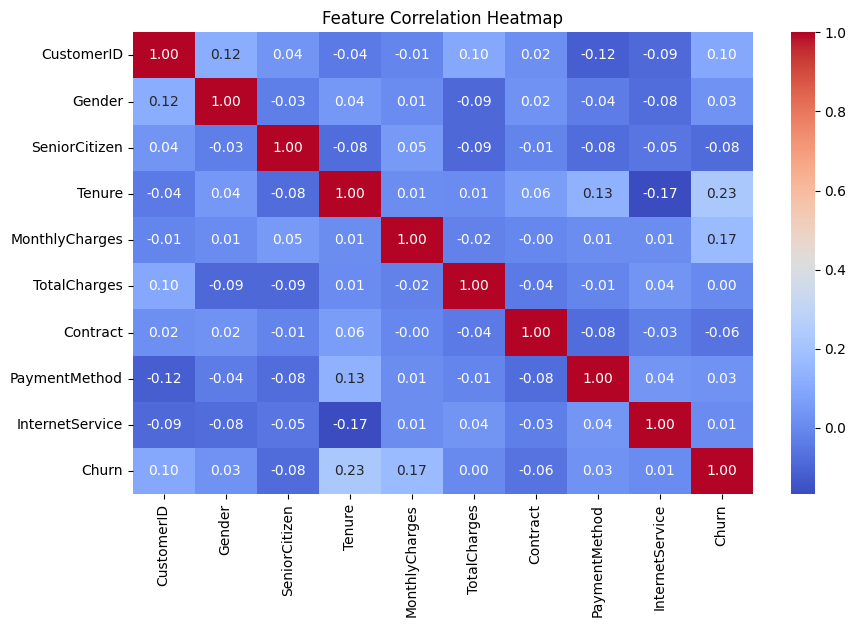


Top Predictors (Logistic Regression):
           Feature  Importance
2           Tenure    0.528806
3   MonthlyCharges    0.376661
5         Contract    0.172855
1    SeniorCitizen    0.167432
7  InternetService    0.092866
0           Gender    0.050625
6    PaymentMethod    0.042972
4     TotalCharges    0.001868

Top Predictors (Random Forest):
           Feature  Importance
2           Tenure    0.274689
3   MonthlyCharges    0.234700
4     TotalCharges    0.219220
6    PaymentMethod    0.073609
5         Contract    0.072285
7  InternetService    0.052580
1    SeniorCitizen    0.036667
0           Gender    0.036249


C:\Users\Dell\AppData\Local\Temp\ipykernel_18484\1049860517.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance["Importance"], y=rf_importance["Feature"], palette="viridis")


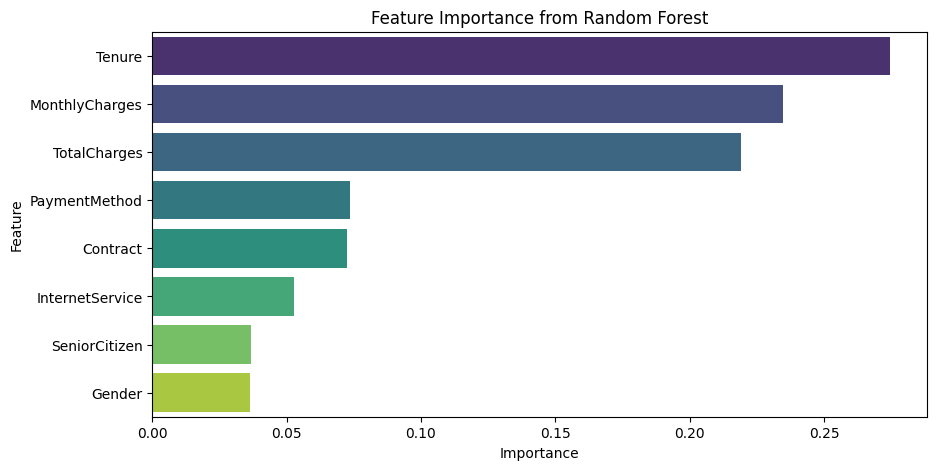

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

np.random.seed(42)
data = {
    "CustomerID": range(1, 201),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "SeniorCitizen": np.random.choice([0, 1], 200),  
    "Tenure": np.random.randint(1, 72, 200),
    "MonthlyCharges": np.random.uniform(20, 120, 200),
    "TotalCharges": np.random.uniform(100, 6000, 200),
    "Contract": np.random.choice(["Month-to-month", "One year", "Two year"], 200),
    "PaymentMethod": np.random.choice(["Electronic check", "Mailed check", "Bank transfer", "Credit card"], 200),
    "InternetService": np.random.choice(["DSL", "Fiber optic", "No"], 200),
    "Churn": np.random.choice(["Yes", "No"], 200, p=[0.3, 0.7])  

df = pd.DataFrame(data)

print("\nDataset Overview:")
print(df.head())

label_encoders = {}
for col in ["Gender", "Contract", "PaymentMethod", "InternetService", "Churn"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(["CustomerID", "Churn"], axis=1)
y = df["Churn"]

correlation_matrix = df.corr()
churn_corr = correlation_matrix["Churn"].drop("Churn").sort_values(ascending=False)

print("\nTop Correlated Features with Churn:")
print(churn_corr)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": np.abs(log_reg.coef_[0])})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("\nTop Predictors (Logistic Regression):")
print(feature_importance)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
rf_importance = rf_importance.sort_values(by="Importance", ascending=False)
print("\nTop Predictors (Random Forest):")
print(rf_importance)

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importance["Importance"], y=rf_importance["Feature"], palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
